<a href="https://colab.research.google.com/github/Sandwhaletree/Mai_Finlab/blob/main/A_%E7%94%9F%E6%B4%BB%E6%87%89%E7%94%A8/C2_104_search_salary_230919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔥🔥🔥**104職業薪資水位_整批圖片下載** ##

### **👉1.安裝自動瀏覽器程式&繁體中文** ###

In [ ]:
#安裝selenium、chromium-chromedriver驅動及更新
!apt-get update
!apt install chromium-chromedriver
!cp/usr/lib/chromium-browser/chromedriver/usr/bin
!pip install selenium #from selenium import webdriver
#安裝繁體中文
!apt-get install fonts-indic
!apt-get install fonts-noto
!apt-get install fonts-noto-cjk

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [993 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [28.5 kB]
Get:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,033 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:13 http://security.ubuntu.com

### **👉2.呼叫selenium相關套件，開啟Chrome自動瀏覽程式** ###
若於Jupyter上運行，則瀏覽器將會自動開啟畫面，惟在Colab上瀏覽器將在私底下運行，看不見畫面。
* 因有安裝繁體中文，故原本無法辨識中文則會順利出線

In [ ]:
import time
from selenium import webdriver

prefs = { #顯示繁體中文語言
  "translate_whitelists": {"your native language":"zh"},
  "translate":{"enabled":"True"}
}
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_experimental_option('prefs', prefs) #顯示繁體中文語言
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)
driver.implicitly_wait(10)

WebDriverException: ignored

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

prefs = { #顯示繁體中文語言
  "translate_whitelists": {"your native language":"zh"},
  "translate":{"enabled":"True"}
}

options = Options()
# options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_experimental_option('prefs', prefs) #顯示繁體中文語言
options.add_argument('--disable-dev-shm-usage')
options.headless = True
driver = webdriver.Chrome('chromedriver', options=options)
driver.implicitly_wait(10)

<ipython-input-7-b69c7fa65261>:16: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True


WebDriverException: ignored

### **👉3.拆解104 url，帶入特定頁面符號** ###


* 薪水估算 >analyze=mix  
* 經歷 >analyze=workexp
* 地區 >analyze=area
* 產業 >analyze=industry
* 學歷 >analyze=edu
* 公司規模 >analyze=scale

> 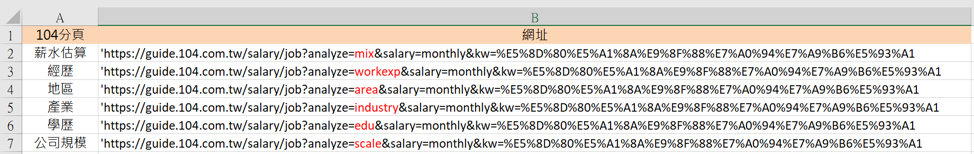


In [ ]:
#獲取104網頁
url = 'https://guide.104.com.tw/salary/'
driver.get(url)

NameError: ignored

In [ ]:
#搜尋職稱title
title = input("請輸入想要搜尋的職位") #ex:區塊鏈
print('準備搜尋title:',title)
#點選搜尋bar，產生下拉式選單
from selenium.webdriver.common.by import By #更新selenium指令
driver.find_element(By.CSS_SELECTOR,"input[placeholder*='輸入職務或選類別']").send_keys(title)
time.sleep(1)
driver.find_element(By.CSS_SELECTOR,"input[placeholder*='輸入職務或選類別']").click()
time.sleep(3)

請輸入想要搜尋的職位保全
準備搜尋title: 保全


In [ ]:
#下單式選單項目
elements = driver.find_elements(By.CLASS_NAME,'menuItem.cursor-pointer')
n=0
for element in elements:
    print('第'+str(n)+'行:',element.text)
    n+=1

第0行: 
第1行: 
第2行: 
第3行: 保全
第4行: 保全人員
第5行: 保全員
第6行: 保全警衛
第7行: 保全組長
第8行: 保全幹部
第9行: 保全督導
第10行: 保全行政組長
第11行: 保全技術人員
第12行: 保全業務


* ####  **3-1選取職位&客製化網址**
  * 根據下拉式選單修改title_job = driver.find_elements(By.CLASS_NAME,'menuItem.cursor-pointer')[4].text

In [ ]:
#選取想要的職位
title_job = driver.find_elements(By.CLASS_NAME,'menuItem.cursor-pointer')[4].text
#確定符合職稱，再次點選[確保[3].text皆一致]
driver.find_elements(By.CLASS_NAME,'menuItem.cursor-pointer')[4].click()
#點擊搜尋，產生url
driver.find_element(By.CSS_SELECTOR,'button').click()
time.sleep(6)
#產生目前網址
url_now = driver.current_url
#客製化網址
url_now = url_now.replace("workexp","{}")
print(url_now)

https://guide.104.com.tw/salary/job?analyze={}&salary=monthly&kw=%E4%BF%9D%E5%85%A8%E4%BA%BA%E5%93%A1


### **👉4.建立新檔案&擷取分頁圖** ###

In [ ]:
#檢查是否有問題
# search = ['mix','workexp','area','industry','edu','scale'] #查詢分頁 #薪水估算=mix；經歷=workexp；地區=area；產業=industry；學歷=edu；公司規模=scale
# url_new = url_now.format(search[3])
# driver.get(url_new)
# time.sleep(3)
# print(driver.current_url) #查看現在頁面
# #參考 url = f"https://guide.104.com.tw/salary/job?analyze={search}&salary=monthly&kw={title}"

https://guide.104.com.tw/salary/job?analyze=industry&salary=monthly&kw=%E5%8D%80%E5%A1%8A%E9%8F%88%E7%A0%94%E7%A9%B6%E5%93%A1


In [ ]:
#輸入欲查詢分頁
search = ['mix','workexp','area','industry','edu','scale'] #查詢分頁 #薪水估算=mix；經歷=workexp；地區=area；產業=industry；學歷=edu；公司規模=scale
# search2 = ['薪水估算','經歷','地區','產業','學歷','公司規模']

driver.set_window_size(1200, 900) #視窗最大化

#改變目前路徑
import os
os.chdir('/content/drive/MyDrive/colab_cloud/104/salary_search')

#建立新檔並將檔案移至新資料夾
if not os.path.isdir(title_job): # 確認是否有jobs_csv資料夾  沒有則返回Ture
  os.mkdir(title_job) # 建立jobs_csv資料夾
  print('建立',title_job,'資料夾完成')
os.chdir(f'./{title_job}') #目錄移至新檔案

import datetime
#逐步開啟分頁印出
for i in range(len(search)):
  driver.get(url_now.format(search[i])) #獲取104個分頁網頁
  if i !=2 and i !=3:
    time.sleep(5)
    #網頁截圖
    date = str(datetime.date.today())
    pic_name = date +'_'+ title_job +'_'+ str(i)+'_'+search[i]+'.png'
    driver.save_screenshot(pic_name)
    print('完成截圖',pic_name)
  else:
    driver.execute_script("document.body.style.zoom='0.7';") #縮小視窗
    time.sleep(5)
    #網頁截圖
    date = str(datetime.date.today())
    pic_name = date +'_'+ title_job +'_'+ str(i)+'_'+search[i]+'.png'
    driver.save_screenshot(pic_name)
    print('完成截圖',pic_name)

建立 保全人員 資料夾完成
完成截圖 2022-12-07_保全人員_0_mix.png
完成截圖 2022-12-07_保全人員_1_workexp.png
完成截圖 2022-12-07_保全人員_2_area.png
完成截圖 2022-12-07_保全人員_3_industry.png
完成截圖 2022-12-07_保全人員_4_edu.png
完成截圖 2022-12-07_保全人員_5_scale.png
